# [Paris Saclay Center for Data Science](http://www.datascience-paris-saclay.fr)

## [RAMP](http://www.ramp.studio): predict products that will be bought

Elliot H, Alexandre B, Gregoire M

## Introduction
This is an initiation project to introduce RAMP and get you to know how it works.

The goal is to develop prediction models able to **predict which product will a costumer buy**. 

With over 90 million clients, Santander is the largest spanish banking group, and according to Forbes, is ranked as 37th in the list of the world biggest public companies. In order to be competitive and to attract clients, a bank needs to create a confidence relationship with its customers, letting them know that their investments are in safe hands, and that the banking group knows what is in their best interest.

To create that kind relationship with their clients, Santander offer a service of customized and personalized product recommandation. Unfortunately, their current system provides for a small number of clients way too many recommandations, while the others rarely see any, resulting in a very unbalanced customer experience. 

The data we will manipulate is from https://www.kaggle.com/c/santander-product-recommendation.

In this RAMP, you will be asked to create a tool that could be sold to Santander Bank. You will be provided with 1.5 years of anonymised customer behavior data from Santander. The data is composed of monthly records of products a consumer has, and informations about that customer.

The original dataset considers a customer at a time t, but for the sake of simplicity in this starting_kit, the temporal dimension will be dropped : you are simply supposed to modelize some general customer's trends that allow to suggest some potentially new products to some potentially new customers.

The original dataset is composed of two main parts: columns 1 to 24 are informations about the customer, and the products a customer can get are the features contained in the columns 25 to 48 of the dataset, named ind_(*name*)_ult1.

A slightly modified version of this dataset is proposed for that RAMP, in which the products are already encoded into a 1-dimensional vector, and in which we considered only a subratio of the global users in the dataset, so that it fits best in RAM (and on github).

## Features description

A good understanding of the features in the dataset is of great help in order to create an efficient model.

**fecha_dato** : The table is partitioned for this column
<br>
**ncodpers** : Customer code
<br>
**ind_empleado** : Employee index (whether or not the client is an employee of Santander): A active, B ex employed, F filial, N not employee, P pasive
<br>
**pais_residencia** : Customer's Country residence
<br>
**sexo** : Customer's sex
<br>
**age** : Age
<br>
**fecha_alta** : The date in which the customer became as the first holder of a contract in the bank
<br>
**ind_nuevo** : New customer Index. 1 if the customer registered in the last 6 months.
<br>
**antiguedad** : Customer seniority (in months)
<br>
**indrel** : 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)
<br>
**ult_fec_cli_1t** : Last date as primary customer (if he isn't at the end of the month)
<br>
**indrel_1mes** : Customer type at the beginning of the month, 1 (First/Primary customer), 2 (co-owner),P (Potential),3 (former primary), 4 (former co-owner)
<br>
**tiprel_1mes** : Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)
<br>
**indresi** : Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)
<br>
**indext** : Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)
<br>
**conyuemp** : Spouse index. 1 if the customer is spouse of an employee
<br>
**canal_entrada** : Channel used by the customer to join
<br>
**indfall** : Deceased index. (S (Yes) or N (No) if the customer is deceased)
<br>
**tipodom** : Addres type. 1, primary address
<br>
**cod_prov** : Province code (customer's address)
<br>
**nomprov** : Province name
<br>
**ind_actividad_cliente** : Activity index (1, active customer; 0, inactive customer)
<br>
**renta** : Gross income of the household
<br>
**segmento** : Segmentation: 01 - VIP, 02 - Individuals, 03 - College graduated

**PRODUCT FEATURES :**
<br>
**ind_ahor_fin_ult1** : Saving Account
<br>
**ind_aval_fin_ult1** : Guarantees
<br>
**ind_cco_fin_ult1** : Current Accounts
<br>
**ind_cder_fin_ult1** : Derivada Account
<br>
**ind_cno_fin_ult1** : Payroll Account
<br>
**ind_ctju_fin_ult1** : Junior Account
<br>
**ind_ctma_fin_ult1** : Más particular Account
<br>
**ind_ctop_fin_ult1** : Particular Account
<br>
**ind_ctpp_fin_ult1** : Particular Plus Account
<br>
**ind_deco_fin_ult1** : Short-term deposits
<br>
**ind_deme_fin_ult1** : Medium-term deposits
<br>
**ind_dela_fin_ult1** : Long-term deposits
<br>
**ind_ecue_fin_ult1** : e-account
<br>
**ind_fond_fin_ult1** : Funds
<br>
**ind_hip_fin_ult1** : Mortgage
<br>
**ind_plan_fin_ult1** : Pensions
<br>
**ind_pres_fin_ult1** : Loans
<br>
**ind_reca_fin_ult1** : Taxes
<br>
**ind_tjcr_fin_ult1** : Credit Card
<br>
**ind_valo_fin_ult1** : Securities
<br>
**ind_viv_fin_ult1** : Home Account
<br>
**ind_nomina_ult1** : Payroll
<br>
**ind_nom_pens_ult1** : Pensions
<br>
**ind_recibo_ult1** : Direct Debit


Those have been encoded in a single 1-dimensional vector, has stated above (taking care about the eventual duplicates, when one customer buys several products on the same day).

## Evaluation

The accuracy of the model will be evaluated according to the Mean Average Precision @7 (MAP@7)

$$\text{MAP@7} = \frac{1}{|U|}\sum_{u = 1}^{|U|}{\frac{1}{\min(m,7)}\sum_{k = 1}^{\min(n,7)}{P_u(k)}} $$

Where $|U|$ is the number of customers in two time points, $P_u(k)$ is the precision at cutoff $k$ for the customer $u$, $n$ is the number of predicted products, and $m$ is the number of added products for the given user at that time point.

Precision of a recommandation system is defined as following :

$$P = \frac{\text{Number of recommandations that are relevant}}{\text{Number of items we recommanded}}$$

![area_pic](data/img/area_pic.png)

Precision $P(k)$ at cutoff $k$ is simply the precision calculated by only considering only the subset of recommandations from rank $1$ to $k$.

![subset_pic](data/img/subset_pic.png)

Since predicting more than the actual number of recommandations does not have a negative impact on the MAP score, we strongly recommand that the predictions all contain 7 items.

Here we will consider $m = 1$, so that one gets less penalized when he mispredicted a product but was anyway giving a great probability to the true product.

We provide here a function to compute the MAP@7

In [1]:
def apk(actual, predicted, k):
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k):
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

## Exploratory analysis

In [2]:
# Load packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("data/train.csv", low_memory = False)

In [4]:
pd.isnull(df).sum()

fecha_dato                    0
ncodpers                      0
ind_empleado                193
pais_residencia             193
sexo                        193
age                           0
fecha_alta                  193
ind_nuevo                   193
antiguedad                    0
indrel                      193
ult_fec_cli_1t           158024
indrel_1mes                 744
tiprel_1mes                 744
indresi                     193
indext                      193
conyuemp                 158089
canal_entrada               833
indfall                     193
tipodom                     193
cod_prov                    813
nomprov                     813
ind_actividad_cliente       193
renta                     27281
segmento                    832
producto                      0
dtype: int64

It seem that some features suffer from missing data. Obviously, dealing with them will be a quite important task in order to get an efficient model. More generaly, cleaning data will be necessary to get accurate predictions.

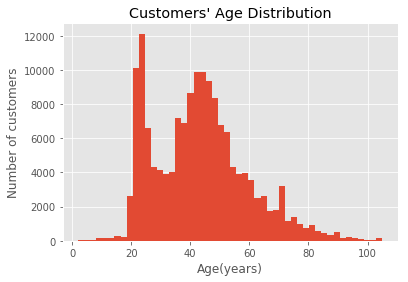

In [5]:
df["age"] = pd.to_numeric(df["age"], errors="coerce") 
df['age'].hist(bins=50)
plt.title("Customers' Age Distribution")
plt.xlabel("Age(years)")
plt.ylabel("Number of customers")
plt.show()

In [6]:
# Customers count by channel 
df['canal_entrada'].value_counts().head(10)

KAT    52836
KFC    41332
KHE    30639
KFA     6053
KHQ     3525
KHK     2479
KHM     1684
KAG     1366
KHN     1136
RED     1077
Name: canal_entrada, dtype: int64

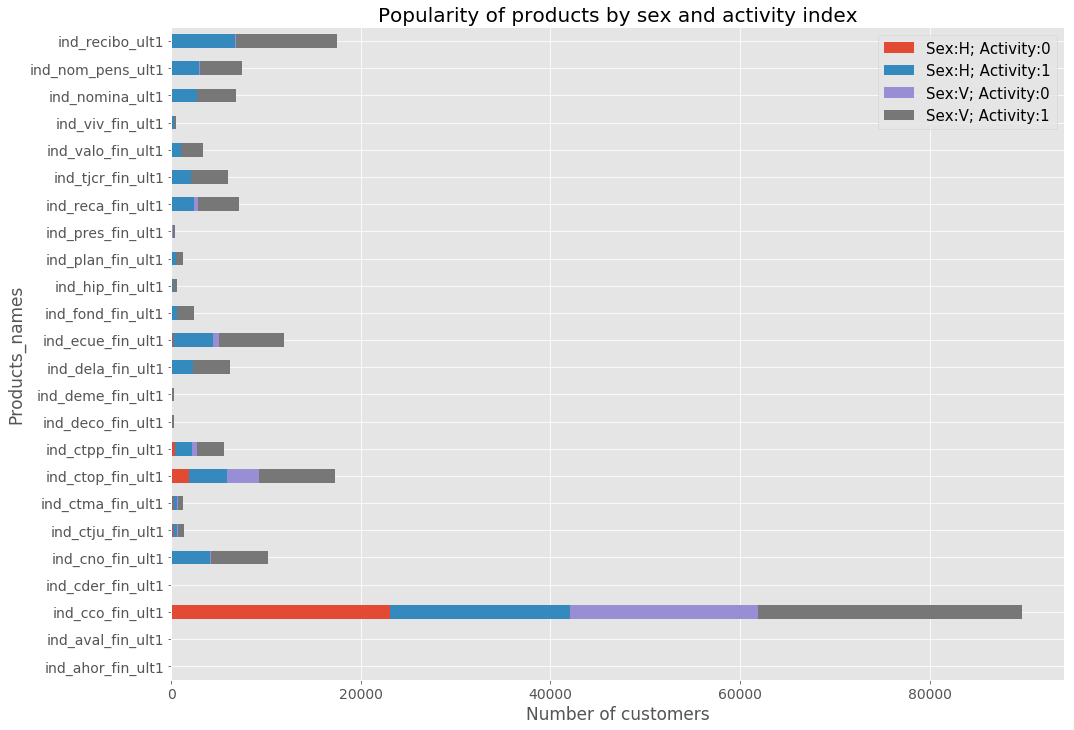

In [7]:
#Number of products by activity index and sex
df = pd.read_csv('data/others/subsample.csv', low_memory=False)
df_a = df.loc[:, ['sexo', 'ind_actividad_cliente']].join(df.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])
df_a = df_a.groupby(['sexo', 'ind_actividad_cliente']).sum()
df_a = df_a.T
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12])
plt.title('Popularity of products by sex and activity index', fontsize=20) 
plt.xlabel('Number of customers', fontsize=17) 
plt.ylabel('Products_names', fontsize=17) 
plt.legend(["Sex:H; Activity:0", "Sex:H; Activity:1", "Sex:V; Activity:0", 
            "Sex:V; Activity:1"], prop={'size':15})
plt.show()

Current account (ind_cco_fin_ult1 feature) is obviously the dominant product. It could be a good idea to exclude it in order to investigate the other products.

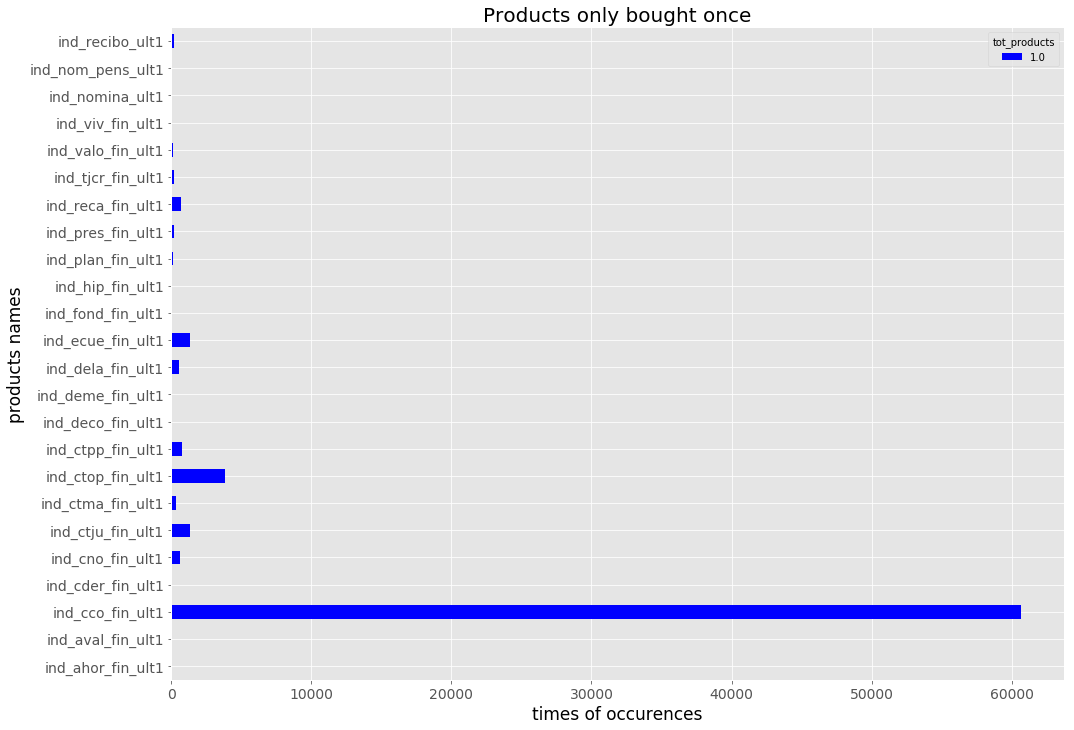

In [8]:
# extract the necessary columns
df["tot_products"] = df.loc[:,"ind_ahor_fin_ult1":"ind_recibo_ult1"].sum(axis=1)
df["tot_products"]   = pd.to_numeric(df["tot_products"], errors="coerce")
df_a = df[df["tot_products"]==1]  # cases where the total products is one
df_a = df_a.loc[:, ["tot_products"]].join(df_a.loc[:, "ind_ahor_fin_ult1":"ind_recibo_ult1"]) 

df_a = df_a.groupby("tot_products").agg("sum")
df_a = df_a.T

df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='winter')
plt.title('Products only bought once', fontsize=20) 
plt.xlabel('times of occurences', fontsize=17, color='black') 
plt.ylabel('products names', fontsize=17, color='black') 
plt.show()

## The pipeline

For submitting at the [RAMP site](http://ramp.studio), you will have to write two classes, saved in two different files:   
* the class `FeatureExtractor`, which will be used to extract features for classification from the dataset and produce a numpy array of size (number of samples $\times$ number of features). 
* a class `Classifier` to predict which product will be bought

### Feature extractor

The feature extractor implements a `transform` member function. It is saved in the file [`submissions/starting_kit/feature_extractor.py`](/edit/submissions/starting_kit/feature_extractor.py). It receives the pandas dataframe `X_df` defined at the beginning of the notebook. It should produce a numpy array representing the extracted features, which will then be used for the classification. The starting kit feature extractor simply converts the pandas dataframe into a numerical array, withough any modification or selection of the features.

Note that the following code cells are *not* executed in the notebook. The notebook saves their contents in the file specified in the first line of the cell, so you can edit your submission before running the local test below and submitting it at the RAMP site.

We provide here a very naive implementation to give some insights.
The following model does nothing more than encode categorical variables, fill Nan's with column-wise means and fit a logit model.

In [9]:
# %load submissions/starting_kit/feature_extractor.py
from sklearn.base import TransformerMixin
from sklearn.preprocessing import Imputer
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

categorical = ['cod_prov','indfall','segmento', 'nomprov', 'ind_actividad_cliente' ,'canal_entrada', 'ind_empleado', 'pais_residencia', 'sexo', 'ind_nuevo', 'indrel', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext']
to_drop = ['fecha_alta','conyuemp', 'ult_fec_cli_1t', 'ncodpers', 'fecha_dato']


class FeatureExtractor(TransformerMixin):
    def __init__(self):
        self.imp = Imputer(strategy = 'mean')
        pass
    
    def fit(self, X_df, y=None):
        x_df = X_df.drop(to_drop, axis = 1)
        x_df = pd.get_dummies(x_df, columns=categorical)
        x_df['antiguedad'] = x_df['antiguedad'].apply(lambda s : np.nan if s == '     NA' else s)
        x_df['age'] = x_df['age'].apply(lambda s : np.nan if s == ' NA' else s)
        self.columns = x_df.columns
        self.imp.fit(x_df)
        return self
 
    def fit_transform(self, X_df, y=None):
        self.fit(X_df)
        return self.transform(X_df)
 
    def transform(self, X_df):
        x_df = X_df.drop(to_drop, axis = 1)
        x_df = pd.get_dummies(x_df, columns=categorical)
        x_df['antiguedad'] = x_df['antiguedad'].apply(lambda s : np.nan if s == '     NA' else s)
        x_df['age'] = x_df['age'].apply(lambda s : np.nan if s == ' NA' else s)
        x_df = x_df.loc[:, [f for f in x_df.columns if f in self.columns]]
        x_df = x_df.loc[:, self.columns]
        x_df = self.imp.transform(x_df)
        return x_df

### Classifier

The classifier follows a classical scikit-learn classifier template. It should be saved in the file [`submissions/starting_kit/classifier.py`](/edit/submissions/starting_kit/classifier.py). In its simplest form it takes a scikit-learn pipeline, assigns it to `self.clf`, then calls its `fit` and `predict_proba` functions in the corresponding member funtions.

In [10]:
# %load submissions/starting_kit/classifier.py
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression
import numpy as np

class Classifier(BaseEstimator):
    def __init__(self, C = 1.):
        self.clf = LogisticRegression(C = C)

    def fit(self, X, y):
        self.clf.fit(X, y)
     
    def predict(self, X):
        return self.clf.predict(X)
    
    def predict_proba(self, X):
        return self.clf.predict_proba(X)

## Local testing (before submission)

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. For this we provide a unit test. Note that the test runs on your files in [`submissions/starting_kit`](/tree/submissions/starting_kit), not on the classes defined in the cells of this notebook.

First `pip install ramp-workflow` or install it from the [github repo](https://github.com/paris-saclay-cds/ramp-workflow). Make sure that the python files `feature_extractor.py` and `classifier.py` are in the  [`submissions/starting_kit`](/tree/submissions/starting_kit) folder, and the data `train.csv` and `test.csv` are in [`data`](/tree/data). Then run

```ramp_test_submission```

If it runs and print training and test errors on each fold, then you can submit the code.

In [11]:
!ramp_test_submission --quick-test

Testing Santander Product Recommandations
Reading train and test files from ./data ...
Reading cv ...
Training .\submissions\starting_kit ...
CV fold 0
Couldn't re-order the score matrix..
	score     map@7
	test   0.125859
	train  0.127757
	valid  0.129156
CV fold 1
Couldn't re-order the score matrix..
	score     map@7
	test   0.124737
	train  0.126946
	valid  0.127666
CV fold 2
Couldn't re-order the score matrix..
	score     map@7
	test   0.124929
	train  0.127043
	valid  0.128197
CV fold 3
Couldn't re-order the score matrix..
	score     map@7
	test   0.125372
	train  0.127064
	valid  0.126519
CV fold 4
Couldn't re-order the score matrix..
	score     map@7
	test   0.125741
	train  0.128305
	valid  0.124613
----------------------------
Mean CV scores
----------------------------
Couldn't re-order the score matrix..
	score                   map@7
	test   0.1253276 ± 0.00043876
	train   0.1274229 ± 0.0005273
	valid    0.12723 ± 0.00156132
----------------------------
Bagged scores
------

## Submitting to [ramp.studio](http://ramp.studio)

Once you found a good feature extractor and classifier, you can submit them to [ramp.studio](http://www.ramp.studio). First, if it is your first time using RAMP, [sign up](http://www.ramp.studio/sign_up), otherwise [log in](http://www.ramp.studio/login). Then find an open event on the particular problem, for example, the event fake_news ([Saclay Datacamp](http://www.ramp.studio/events/fake_news_saclay_datacamp_17), [DataFest Tbilisi](https://www.ramp.studio/events/fake_news_tbilisi)) for this RAMP. Sign up for the event. Both signups are controled by RAMP administrators, so there **can be a delay between asking for signup and being able to submit**.

Once your signup request is accepted, you can go to your sandbox ([Saclay Datacamp](http://www.ramp.studio/events/fake_news_saclay_datacamp_17/sandbox), [DataFest Tbilisi](https://www.ramp.studio/events/fake_news_tbilisi/sandbox)) and copy-paste (or upload) [`feature_extractor.py`](/edit/submissions/starting_kit/feature_extractor.py) and [`classifier.py`](/edit/submissions/starting_kit/classifier.py) from `submissions/starting_kit`. Save it, rename it, then submit it. The submission is trained and tested on our backend in the same way as `ramp_test_submission` does it locally. While your submission is waiting in the queue and being trained, you can find it in the "New submissions (pending training)" table in my submissions ([Saclay Datacamp](http://www.ramp.studio/events/fake_news_saclay_datacamp_17/my_submissions), [DataFest Tbilisi](https://www.ramp.studio/events/fake_news_tbilisi/my_submissions)). Once it is trained, you get a mail, and your submission shows up on the public leaderboard ([Saclay Datacamp](http://www.ramp.studio/events/fake_news_saclay_datacamp_17/leaderboard), [DataFest Tbilisi](https://www.ramp.studio/events/fake_news_tbilisi/leaderboard)). 
If there is an error (despite having tested your submission locally with `ramp_test_submission`), it will show up in the "Failed submissions" table in my submissions ([Saclay Datacamp](http://www.ramp.studio/events/fake_news_saclay_datacamp_17/my_submissions), [DataFest Tbilisi](https://www.ramp.studio/events/fake_news_tbilisi/my_submissions)). You can click on the error to see part of the trace.

After submission, do not forget to give credits to the previous submissions you reused or integrated into your submission.

The data set we use at the backend is usually different from what you find in the starting kit, so the score may be different.

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, perhaps do some AutoML/hyperopt, etc., _locally_, and checking them with `ramp_test_submission`. The script prints mean cross-validation scores 
```
----------------------------
	score     map@7
	test   0.125741
	train  0.128305
	valid  0.124613
----------------------------
```
The official score in this RAMP is map@7, so the line that is relevant in the output of `ramp_test_submission` is `valid map@7 =  0.12723 ± 0.00156132`. When the score is good enough, you can submit it at the RAMP.

## More information

You can find more information in the [README](https://github.com/paris-saclay-cds/ramp-workflow/blob/master/README.md) of the [ramp-workflow library](https://github.com/paris-saclay-cds/ramp-workflow).

## Contact

Don't hesitate to [contact us](mailto:admin@ramp.studio?subject=fake news notebook).